## sandbox workspace for function training 



In [ ]:
#TODO find jupyter notebook active .json file
# OLD one  jupyter cjonsole --existing /Users/alexdhawan/Library/Jupyter/runtime/kernel-v31d5d3e1bb3b9299281d46b504b7f05c953249474.json
# use "jupyter notebook --existing"

In [ ]:
### from CHAT 
import pysofaconventions as sofa
import soundfile as sf
import numpy as np
import os
from scipy.io import wavfile
import importlib
import matplotlib.pyplot as plt
import data_preprocessing; importlib.reload(data_preprocessing); import data_preprocessing
import feature_extract; importlib.reload(feature_extract); import feature_extract
import viz; importlib.reload(viz); import viz

os.chdir('/Users/alexdhawan/Desktop/ECE5730/ML-head-transfer-functions/python_training/scripts/')
path = '/Users/alexdhawan/Desktop/ECE5730/ML-head-transfer-functions/python_training/data/training_audio/raw/from_KEMAR/elev10/H10e005a.wav'
left, right, sample_rate, label=data_preprocessing.reformat_wav(path)


In [ ]:
import pysofaconventions as sofa
import soundfile as sf
import numpy as np
import os
import glob
from scipy.io import wavfile
import importlib
import matplotlib.pyplot as plt
import data_preprocessing; importlib.reload(data_preprocessing); import data_preprocessing
import feature_extract; importlib.reload(feature_extract); import feature_extract
import viz; importlib.reload(viz); import viz
from mpl_toolkits.mplot3d import Axes3D
paths = glob.glob(
    "/Users/alexdhawan/Desktop/ECE5730/ML-head-transfer-functions/python_training/data/training_audio/raw/from_KEMAR/**/*.wav",
    recursive=True,
)

elev_list = []
horiz_list = []
feat_list = []
label_list   = []
for path in paths:
    # if "H10" in path and"005" in path:
    left, right, sample_rate, label = data_preprocessing.reformat_wav(path)
    # label[0] = elevation, label[1] = azimuth, right?
    spec_feat, _ = feature_extract.compute_spectral_features(left, right, sample_rate)
    _ ,ILD = feature_extract.compute_ILD(left, right, sample_rate)
    _, ITD = feature_extract.compute_ITD(left, right, sample_rate)
    ITD = np.array([ITD])
    ILD = np.array(ILD)
    feat_vec = np.concatenate((ITD, ILD,spec_feat), axis=0)
    elev_list.append(label[0])
    horiz_list.append(label[1])
    feat_list.append(feat_vec)

    label_list.append(label)

    # print(spec_feat.shape)

elev = np.array(elev_list, dtype=float)
horiz = np.array(horiz_list, dtype=float)
features = np.stack(feat_list, axis=0)   # shape (N_samples, D_features)

print("features shape:", features.shape)
label = np.stack(label_list, axis=0)
print("Label shape:", label.shape)



(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,)
(65,

In [98]:
import data_preprocessing; importlib.reload(data_preprocessing); import data_preprocessing; 

V = label[:,0]*np.pi/180
H = label[:,1]*np.pi/180
alpha_ = np.arccos(np.cos(V)*np.sin(H))
beta_ = np.atan2(np.sin(V), np.cos(V)*np.cos(H))
labels_transformed = np.stack((alpha_, beta_), axis=1)

alpha2, beta2 =  data_preprocessing.horiz_vert_to_axis_angle(H,V)
print((alpha2-alpha_).max())

0.0


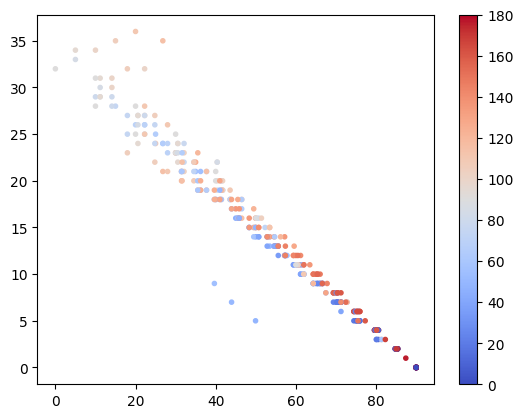

In [90]:
fig = plt.figure()
ax = fig.add_subplot()
A = label[:,0]*np.pi/180
H = label[:,1]*np.pi/180
alpha_ = np.arccos(np.cos(A)*np.sin(H))
beta_ = np.atan2(np.sin(A), np.cos(A)*np.cos(H))
# ax.scatter(alpha_*180/np.pi-90, features[:,0],c=H*180/np.pi, cmap='coolwarm',marker='.')
fig.colorbar(ax.scatter(alpha_*180/np.pi, features[:,0],c=H*180/np.pi, cmap='coolwarm',marker='.'))
plt.show()

In [3]:
# correlation of each feature with elevation
D = features.shape[1]
corr_elev = []
corr_horiz   = []

for j in range(D):
    f = features[:, j]
    # guard against constant features
    if np.std(f) < 1e-8:
        corr_elev.append(0.0)
        corr_az.append(0.0)
        continue
    ce = np.corrcoef(f, elev)[0, 1]
    ca = np.corrcoef(f, horiz)[0, 1]
    corr_elev.append(ce)
    corr_horiz.append(ca)

corr_elev = np.array(corr_elev)
corr_az   = np.array(corr_horiz)

print("corr with elevation:")
for j in range(D):
    print(f"feature {j:2d}: corr_elev={corr_elev[j]: .3f}, corr_az={corr_horiz[j]: .3f}")


corr with elevation:
feature  0: corr_elev=-0.385, corr_az= 0.028
feature  1: corr_elev=-0.082, corr_az= 0.025
feature  2: corr_elev= 0.002, corr_az= 0.023
feature  3: corr_elev= 0.047, corr_az= 0.003
feature  4: corr_elev= 0.065, corr_az=-0.042
feature  5: corr_elev= 0.013, corr_az=-0.077
feature  6: corr_elev= 0.134, corr_az=-0.130
feature  7: corr_elev= 0.124, corr_az=-0.188
feature  8: corr_elev= 0.214, corr_az=-0.213
feature  9: corr_elev= 0.264, corr_az=-0.213
feature 10: corr_elev= 0.243, corr_az=-0.191
feature 11: corr_elev= 0.266, corr_az=-0.125
feature 12: corr_elev= 0.281, corr_az=-0.096
feature 13: corr_elev= 0.309, corr_az=-0.094
feature 14: corr_elev= 0.321, corr_az=-0.098
feature 15: corr_elev= 0.321, corr_az=-0.098
feature 16: corr_elev= 0.292, corr_az=-0.103
feature 17: corr_elev= 0.270, corr_az=-0.115
feature 18: corr_elev= 0.249, corr_az=-0.129
feature 19: corr_elev= 0.205, corr_az=-0.136
feature 20: corr_elev= 0.126, corr_az=-0.147
feature 21: corr_elev= 0.078, corr

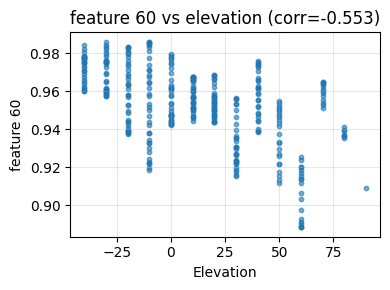

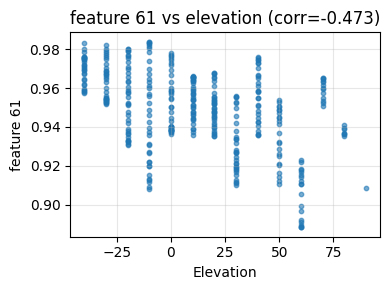

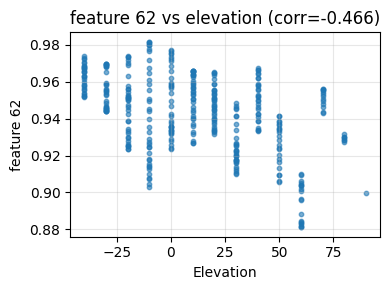

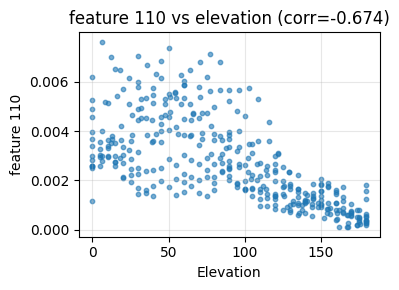

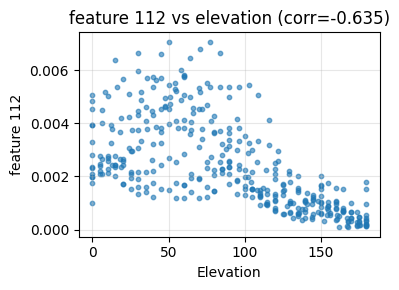

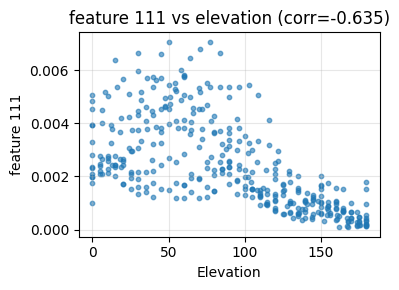

In [4]:
top_k = 3
top_elev_idx = np.argsort(-np.abs(corr_elev))[:top_k]

for j in top_elev_idx:
    plt.figure(figsize=(4, 3))
    plt.scatter(elev, features[:, j], s=10, alpha=0.6)
    plt.xlabel("Elevation")
    plt.ylabel(f"feature {j}")
    plt.title(f"feature {j} vs elevation (corr={corr_elev[j]:.3f})")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
top_k = 3
top_horiz_idx = np.argsort(-np.abs(corr_horiz))[:top_k]

for j in top_horiz_idx:
    plt.figure(figsize=(4, 3))
    plt.scatter(horiz, features[:, j], s=10, alpha=0.6)
    plt.xlabel("Elevation")
    plt.ylabel(f"feature {j}")
    plt.title(f"feature {j} vs elevation (corr={corr_horiz[j]:.3f})")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
